# In this assignment I am going to compare 5 CNN models. More details are listed below
# (A) CNN with 1,2,3,4,5 hidden layers
# (B) rectified linear units and sigmoid units
# (C) with and without data augmentation
# (D) CNN three different optimizers: RMSprop, Adagrad and Adam
# (E) (CONV2D, Activation, CONV2D, Activation) layers with 3x3 filters vs (CONV2D, Activation) layers with 5x5 filters


In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# (A) cnn with 1,2,3,4,5 hidden layers

In [26]:

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

cnn_acc=history.history['acc']
cnn_vaacc=history.history['val_acc']

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 339s 7ms/step - loss: 1.7885 - acc: 0.3475 - val_loss: 1.5241 - val_acc: 0.4517
Epoch 2/20
50000/50000 [==============================] - 300s 6ms/step - loss: 1.4653 - acc: 0.4719 - val_loss: 1.3164 - val_acc: 0.5347
Epoch 3/20
50000/50000 [==============================] - 313s 6ms/step - loss: 1.3142 - acc: 0.5296 - val_loss: 1.2204 - val_acc: 0.5671
Epoch 4/20
50000/50000 [==============================] - 322s 6ms/step - loss: 1.2111 - acc: 0.5699 - val_loss: 1.1001 - val_acc: 0.6131
Epoch 5/20
50000/50000 [==============================] - 329s 7ms/step - loss: 1.1213 - acc: 0.6012 - val_loss: 1.0210 - val_acc: 0.6401
Epoch 6/20
50000/50000 [==============================] - 299s 6ms/step - loss: 1.0522 - acc: 0.6300 - val_loss: 0.9676 - val_acc: 0.6636
Epoch 7/20
50000/500

In [53]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')


# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

def get_accu(model):
    
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True)
    
    scores = model.evaluate(x_test, y_test, verbose=1)
    
    return history.history['acc'], history.history['val_acc']


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [41]:
model1=Sequential()
model1.add(Flatten())
model1.add(Dense(10,activation='softmax'))
train_acc1, val_acc1 = get_accu(model1)
keras.backend.clear_session()



Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 37s 749us/step - loss: 1.9822 - acc: 0.2910 - val_loss: 1.8892 - val_acc: 0.3402
Epoch 2/20
50000/50000 [==============================] - 9s 186us/step - loss: 1.8526 - acc: 0.3543 - val_loss: 1.8877 - val_acc: 0.3213
Epoch 3/20
50000/50000 [==============================] - 7s 146us/step - loss: 1.8170 - acc: 0.3673 - val_loss: 1.8137 - val_acc: 0.3630
Epoch 4/20
50000/50000 [==============================] - 5s 94us/step - loss: 1.7961 - acc: 0.3779 - val_loss: 1.7937 - val_acc: 0.3751
Epoch 5/20
50000/50000 [==============================] - 5s 103us/step - loss: 1.7826 - acc: 0.3855 - val_loss: 1.7811 - val_acc: 0.3851
Epoch 6/20
50000/50000 [==============================] - 8s 160us/step - loss: 1.7711 - acc: 0.3886 - val_loss: 1.7839 - val_acc: 0.3826
Epoch 7/20
50000/50000 [==============================] - 5s 97us/step - loss: 1.7620 - acc: 0.3921 - val_loss: 1.7924 - v

In [20]:
model2=Sequential()
model2.add(Flatten())
model2.add(Dense(units=512,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))
train_acc2, val_acc2  =get_accu(model2)
keras.backend.clear_session()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 57s 1ms/step - loss: 1.9688 - acc: 0.2898 - val_loss: 1.8167 - val_acc: 0.3474
Epoch 2/20
50000/50000 [==============================] - 65s 1ms/step - loss: 1.8138 - acc: 0.3542 - val_loss: 1.7006 - val_acc: 0.4047
Epoch 3/20
50000/50000 [==============================] - 62s 1ms/step - loss: 1.7532 - acc: 0.3801 - val_loss: 1.6644 - val_acc: 0.4203
Epoch 4/20
50000/50000 [==============================] - 58s 1ms/step - loss: 1.7141 - acc: 0.3901 - val_loss: 1.6435 - val_acc: 0.4218
Epoch 5/20
50000/50000 [==============================] - 53s 1ms/step - loss: 1.6855 - acc: 0.4025 - val_loss: 1.5792 - val_acc: 0.4454
Epoch 6/20
50000/50000 [==============================] - 53s 1ms/step - loss: 1.6583 - acc: 0.4148 - val_loss: 1.5603 - val_acc: 0.4539
Epoch 7/20
50000/50000 [==============================] - 62s 1ms/step - loss: 1.6366 - acc: 0.4270 - val_loss: 1.5652 - val_acc

In [23]:
model3=Sequential()
model3.add(Flatten())
model3.add(Dense(units=512,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=512,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10,activation='softmax'))
train_acc3, val_acc3  =get_accu(model3)
keras.backend.clear_session()


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 72s 1ms/step - loss: 2.0627 - acc: 0.2409 - val_loss: 1.8543 - val_acc: 0.3431
Epoch 2/20
50000/50000 [==============================] - 70s 1ms/step - loss: 1.8964 - acc: 0.3141 - val_loss: 1.7598 - val_acc: 0.3811
Epoch 3/20
50000/50000 [==============================] - 60s 1ms/step - loss: 1.8315 - acc: 0.3414 - val_loss: 1.7218 - val_acc: 0.3904
Epoch 4/20
50000/50000 [==============================] - 60s 1ms/step - loss: 1.8040 - acc: 0.3552 - val_loss: 1.7106 - val_acc: 0.3983
Epoch 5/20
50000/50000 [==============================] - 53s 1ms/step - loss: 1.7767 - acc: 0.3676 - val_loss: 1.6366 - val_acc: 0.4190
Epoch 6/20
50000/50000 [==============================] - 55s 1ms/step - loss: 1.7553 - acc: 0.3756 - val_loss: 1.6318 - val_acc: 0.4297
Epoch 7/20
50000/50000 [==============================] - 59s 1ms/step - loss: 1.7408 - acc: 0.3817 - val_loss: 1.6114 - val_acc

In [25]:

model4=Sequential()
model4.add(Flatten())
model4.add(Dense(units=512,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(units=512,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(units=512,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10,activation='softmax'))
train_acc4, val_acc4  = get_accu(model4)
keras.backend.clear_session()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 78s 2ms/step - loss: 2.1333 - acc: 0.2027 - val_loss: 1.9073 - val_acc: 0.3244
Epoch 2/20
50000/50000 [==============================] - 61s 1ms/step - loss: 1.9479 - acc: 0.2861 - val_loss: 1.8133 - val_acc: 0.3534
Epoch 3/20
50000/50000 [==============================] - 56s 1ms/step - loss: 1.8930 - acc: 0.3116 - val_loss: 1.7639 - val_acc: 0.3754
Epoch 4/20
50000/50000 [==============================] - 55s 1ms/step - loss: 1.8547 - acc: 0.3284 - val_loss: 1.7270 - val_acc: 0.3916
Epoch 5/20
50000/50000 [==============================] - 55s 1ms/step - loss: 1.8269 - acc: 0.3406 - val_loss: 1.7304 - val_acc: 0.3999
Epoch 6/20
50000/50000 [==============================] - 58s 1ms/step - loss: 1.8036 - acc: 0.3528 - val_loss: 1.7042 - val_acc: 0.4125
Epoch 7/20
50000/50000 [==============================] - 60s 1ms/step - loss: 1.7879 - acc: 0.3583 - val_loss: 1.6761 - val_acc

In [54]:
model5=Sequential()
model5.add(Flatten())
model5.add(Dense(units=512,activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(units=512,activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(units=512,activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(units=512,activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10,activation='softmax'))
train_acc5, val_acc5  = get_accu(model5)
keras.backend.clear_session()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 106s 2ms/step - loss: 2.1909 - acc: 0.1671 - val_loss: 2.0043 - val_acc: 0.2516
Epoch 2/20
50000/50000 [==============================] - 73s 1ms/step - loss: 2.0084 - acc: 0.2456 - val_loss: 1.8822 - val_acc: 0.3312
Epoch 3/20
50000/50000 [==============================] - 78s 2ms/step - loss: 1.9515 - acc: 0.2796 - val_loss: 1.8438 - val_acc: 0.3449
Epoch 4/20
50000/50000 [==============================] - 73s 1ms/step - loss: 1.9152 - acc: 0.2982 - val_loss: 1.8198 - val_acc: 0.3644
Epoch 5/20
50000/50000 [==============================] - 63s 1ms/step - loss: 1.8822 - acc: 0.3155 - val_loss: 1.7866 - val_acc: 0.3600
Epoch 6/20
50000/50000 [==============================] - 63s 1ms/step - loss: 1.8601 - acc: 0.3241 - val_loss: 1.7791 - val_acc: 0.3895
Epoch 7/20
50000/50000 [==============================] - 62s 1ms/step - loss: 1.8464 - acc: 0.3339 - val_loss: 1.7744 - val_ac

In [55]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np

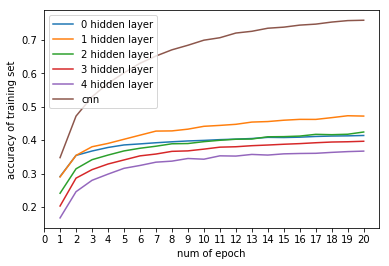

In [56]:
df1=pd.DataFrame({'num':range(1,21),'ac1':train_acc1,'ac2':train_acc2,'ac3':train_acc3,'ac4':train_acc4,'ac5':train_acc5,'cnn':cnn_acc})
p1=plt.plot('num','ac1',data=df1)
p2=plt.plot('num','ac2',data=df1)
p3=plt.plot('num','ac3',data=df1)
p4=plt.plot('num','ac4',data=df1)
p5=plt.plot('num','ac5',data=df1)
p6=plt.plot('num','cnn',data=df1)

plt.ylabel('accuracy of training set')
plt.xlabel('num of epoch')
plt.xticks(np.arange(0,21))
plt.legend(('0 hidden layer','1 hidden layer','2 hidden layer','3 hidden layer','4 hidden layer','cnn'))
plt.show()

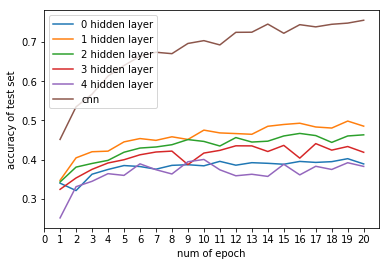

In [57]:
df2=pd.DataFrame({'num':range(1,21),'ac1':val_acc1,'ac2':val_acc2,'ac3':val_acc3,'ac4':val_acc4,'ac5':val_acc5,'cnn':cnn_vaacc})
p1=plt.plot('num','ac1',data=df2)
p2=plt.plot('num','ac2',data=df2)
p3=plt.plot('num','ac3',data=df2)
p4=plt.plot('num','ac4',data=df2)
p5=plt.plot('num','ac5',data=df2)
p6=plt.plot('num','cnn',data=df2)

plt.ylabel('accuracy of test set')
plt.xlabel('num of epoch')
plt.xticks(np.arange(0,21))
plt.legend(('0 hidden layer','1 hidden layer','2 hidden layer','3 hidden layer','4 hidden layer','cnn'))
plt.show()

# (B) rectified linear units and sigmoid units

In [59]:

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    history2=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history2=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

cnn_acc_sigmoid=history2.history['acc']
cnn_vaacc_sigmoid=history2.history['val_acc']

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 492s 10ms/step - loss: 2.3277 - acc: 0.1004 - val_loss: 2.3053 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 509s 10ms/step - loss: 2.3076 - acc: 0.0997 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 438s 9ms/step - loss: 2.3060 - acc: 0.0999 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 362s 7ms/step - loss: 2.3047 - acc: 0.0993 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 413s 8ms/step - loss: 2.3041 - acc: 0.0982 - val_loss: 2.3050 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 499s 10ms/step - loss: 2.3040 - acc: 0.1007 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/20
50000/

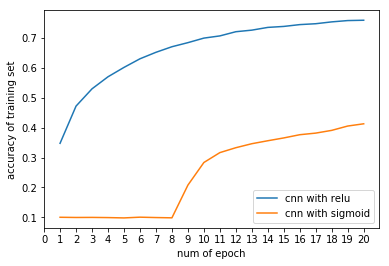

In [63]:
df4=pd.DataFrame({'num':range(1,21),'ac1':cnn_acc,'ac2':cnn_acc_sigmoid})
p1=plt.plot('num','ac1',data=df4)
p2=plt.plot('num','ac2',data=df4)

plt.ylabel('accuracy of training set')
plt.xlabel('num of epoch')
plt.xticks(np.arange(0,21))
plt.legend(('cnn with relu','cnn with sigmoid'))
plt.show()

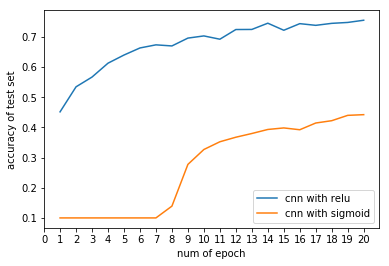

In [62]:
df5=pd.DataFrame({'num':range(1,21),'ac1':cnn_vaacc,'ac2':cnn_vaacc_sigmoid})
p1=plt.plot('num','ac1',data=df5)
p2=plt.plot('num','ac2',data=df5)

plt.ylabel('accuracy of test set')
plt.xlabel('num of epoch')
plt.xticks(np.arange(0,21))
plt.legend(('cnn with relu','cnn with sigmoid'))
plt.show()

# (C).2 without data augmentation and do not drop dropout

In [ ]:
#without data augmentation and do not drop dropout
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



# (C) with and without data augmentation

In [ ]:
# without data augmentation and drop dropout
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# (D) three different optimizers: RMSprop, Adagrad and Adam

In [ ]:
#with data augmentation and drop dropout
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.Adagrad(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# (E) (CONV2D, Activation, CONV2D, Activation) layers with 3x3 filters vs (CONV2D, Activation) layers with 5x5 filters 

In [ ]:

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.Adadelta(lr=1, rho=0.95,decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])